**Problem Statement**



India is the top country in the world by population and it is facing substantial difficulties in dealing with this constantly growing population. Life expectancy, rightly, is a demographic measure  it reflects the health and thus the well-being of the population, which through various scenarios can be used by decision makers and planners.



The objective of this study is to design a machine learning model, which can make a prediction on average life expectancy of individuals residing in India from the available data. The rationale behind this model is to investigate the trends and unveil the state understanding the factors that would contribute to a better comprehension of life expectancy trends which, in turn, would inform strategic decisions in health care, economy and social spheres.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Purpose: Importing essential libraries for data manipulation (Pandas), numerical computations (NumPy), data visualization (Matplotlib and Seaborn).

In [ ]:
df = pd.read_csv('/content/india_life_expectancy_dataset.csv')
df

,State/Region,Year,Urbanization_Rate,Literacy_Rate,Infant_Mortality_Rate,Healthcare_Expenditure_Per_Capita,Average_Income,Sanitation_Access_Percentage,Life_Expectancy_at_Birth,Obesity_Rate,Pollution_Index,Population_Density,Access_to_Clean_Water_Percentage,Unemployment_Rate,Hospital_Beds_Per_1000,Poverty_Rate
0,Gujarat,2001,71.017194,72.137845,23.704764,7634.273057,200019.885370,99.968834,79.830103,15.860086,77.567941,13822.169499,53.634325,19.903258,1.049567,28.471018
1,Punjab,2015,75.401646,85.289122,20.599732,3888.664063,232901.889905,32.769578,85.000000,7.773574,134.587296,452.077021,56.642639,18.717242,1.723235,38.616540
2,Delhi,2019,68.191494,73.506397,32.131754,5442.666458,237900.150683,90.486099,81.882106,6.797542,136.097310,3377.112161,84.875277,12.233886,3.782401,32.617852
3,Manipur,2015,55.049889,55.613189,14.987895,2230.456221,102708.219247,63.773918,73.652674,10.710455,58.086341,16779.341560,76.032007,9.004711,1.525781,38.027381
4,Karnataka,2005,70.222865,69.191609,12.331859,5389.427127,152534.302180,89.664444,84.316390,15.317188,40.766083,10002.846237,89.726227,17.341148,2.605541,26.529433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,Arunachal Pradesh,2020,34.567960,81.736731,40.329442,3489.458578,144768.894462,45.228735,62.085031,6.870310,65.619654,16467.343830,68.072763,5.555889,2.616207,26.879147
29996,Uttarakhand,2016,26.761035,72.999053,29.318979,8164.092071,112649.919879,55.554142,67.284570,12.538053,129.752993,2148.708800,90.203577,17.643708,1.909136,17.056378
29997,Meghalaya,2018,67.193045,61.051235,16.313857,2071.485466,75182.701118,92.001448,65.140388,8.102667,100.654356,17525.623228,86.615443,12.575981,2.194445,25.822358
29998,Uttarakhand,2005,20.106703,81.489769,26.062591,7615.659062,53755.617835,75.285659,61.631671,16.103483,87.668101,12129.603030,93.441817,10.063429,0.955884,44.645925


Purpose: Load the life_expectancy dataset into a Pandas DataFrame for analysis and display the few rows.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   State/Region                       30000 non-null  object 
 1   Year                               30000 non-null  int64  
 2   Urbanization_Rate                  30000 non-null  float64
 3   Literacy_Rate                      30000 non-null  float64
 4   Infant_Mortality_Rate              30000 non-null  float64
 5   Healthcare_Expenditure_Per_Capita  30000 non-null  float64
 6   Average_Income                     30000 non-null  float64
 7   Sanitation_Access_Percentage       30000 non-null  float64
 8   Life_Expectancy_at_Birth           30000 non-null  float64
 9   Obesity_Rate                       30000 non-null  float64
 10  Pollution_Index                    30000 non-null  float64
 11  Population_Density                 30000 non-null  flo

Purpose: Check the information about dataset

In [ ]:
df.isnull().sum()

,0
State/Region,0
Year,0
Urbanization_Rate,0
Literacy_Rate,0
Infant_Mortality_Rate,0
Healthcare_Expenditure_Per_Capita,0
Average_Income,0
Sanitation_Access_Percentage,0
Life_Expectancy_at_Birth,0
Obesity_Rate,0


Purpose: Identify missing values in the dataset.

In [ ]:
df.duplicated().sum()

0

Purpose: Check for duplicate rows in the dataset and confirm data integrity.

In [ ]:
df.describe()

,Year,Urbanization_Rate,Literacy_Rate,Infant_Mortality_Rate,Healthcare_Expenditure_Per_Capita,Average_Income,Sanitation_Access_Percentage,Life_Expectancy_at_Birth,Obesity_Rate,Pollution_Index,Population_Density,Access_to_Clean_Water_Percentage,Unemployment_Rate,Hospital_Beds_Per_1000,Poverty_Rate
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2011.052333,52.739365,72.457160,27.471285,5996.848123,175797.059873,64.885706,72.868086,17.507292,90.043544,10011.880108,75.009566,13.422244,2.748566,30.028833
std,6.630550,18.796189,12.972384,12.998043,2308.539182,72150.111298,20.269637,9.416403,7.223169,34.716431,5771.480567,14.459442,6.618437,1.301834,11.536098
min,2000.000000,20.003090,50.005180,5.010301,2000.018210,50002.728432,30.003749,50.000000,5.000522,30.006729,50.178863,50.000569,2.000462,0.500387,10.000352
25%,2005.000000,36.558809,61.242162,16.140907,4002.599993,113159.936992,47.191447,66.063625,11.271775,59.824279,4974.513063,62.464649,7.717531,1.610992,19.981384
50%,2011.000000,52.621608,72.408745,27.485352,5981.249540,176570.380929,64.791051,73.637543,17.534815,90.192991,10011.408369,75.036380,13.424749,2.745385,30.138732
75%,2017.000000,69.231858,83.637894,38.660958,7992.073498,238275.830890,82.484949,81.191104,23.751831,120.046919,15017.128433,87.542303,19.114479,3.879040,40.046138
max,2022.000000,84.993178,94.996039,49.996277,9999.873548,299990.243763,99.997199,85.000000,29.999275,149.994911,19999.986316,99.999876,24.998707,4.999983,49.999145


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Urbanization_Rate'}>,
        <Axes: title={'center': 'Literacy_Rate'}>,
        <Axes: title={'center': 'Infant_Mortality_Rate'}>],
       [<Axes: title={'center': 'Healthcare_Expenditure_Per_Capita'}>,
        <Axes: title={'center': 'Average_Income'}>,
        <Axes: title={'center': 'Sanitation_Access_Percentage'}>,
        <Axes: title={'center': 'Life_Expectancy_at_Birth'}>],
       [<Axes: title={'center': 'Obesity_Rate'}>,
        <Axes: title={'center': 'Pollution_Index'}>,
        <Axes: title={'center': 'Population_Density'}>,
        <Axes: title={'center': 'Access_to_Clean_Water_Percentage'}>],
       [<Axes: title={'center': 'Unemployment_Rate'}>,
        <Axes: title={'center': 'Hospital_Beds_Per_1000'}>,
        <Axes: title={'center': 'Poverty_Rate'}>, <Axes: >]], dtype=object)

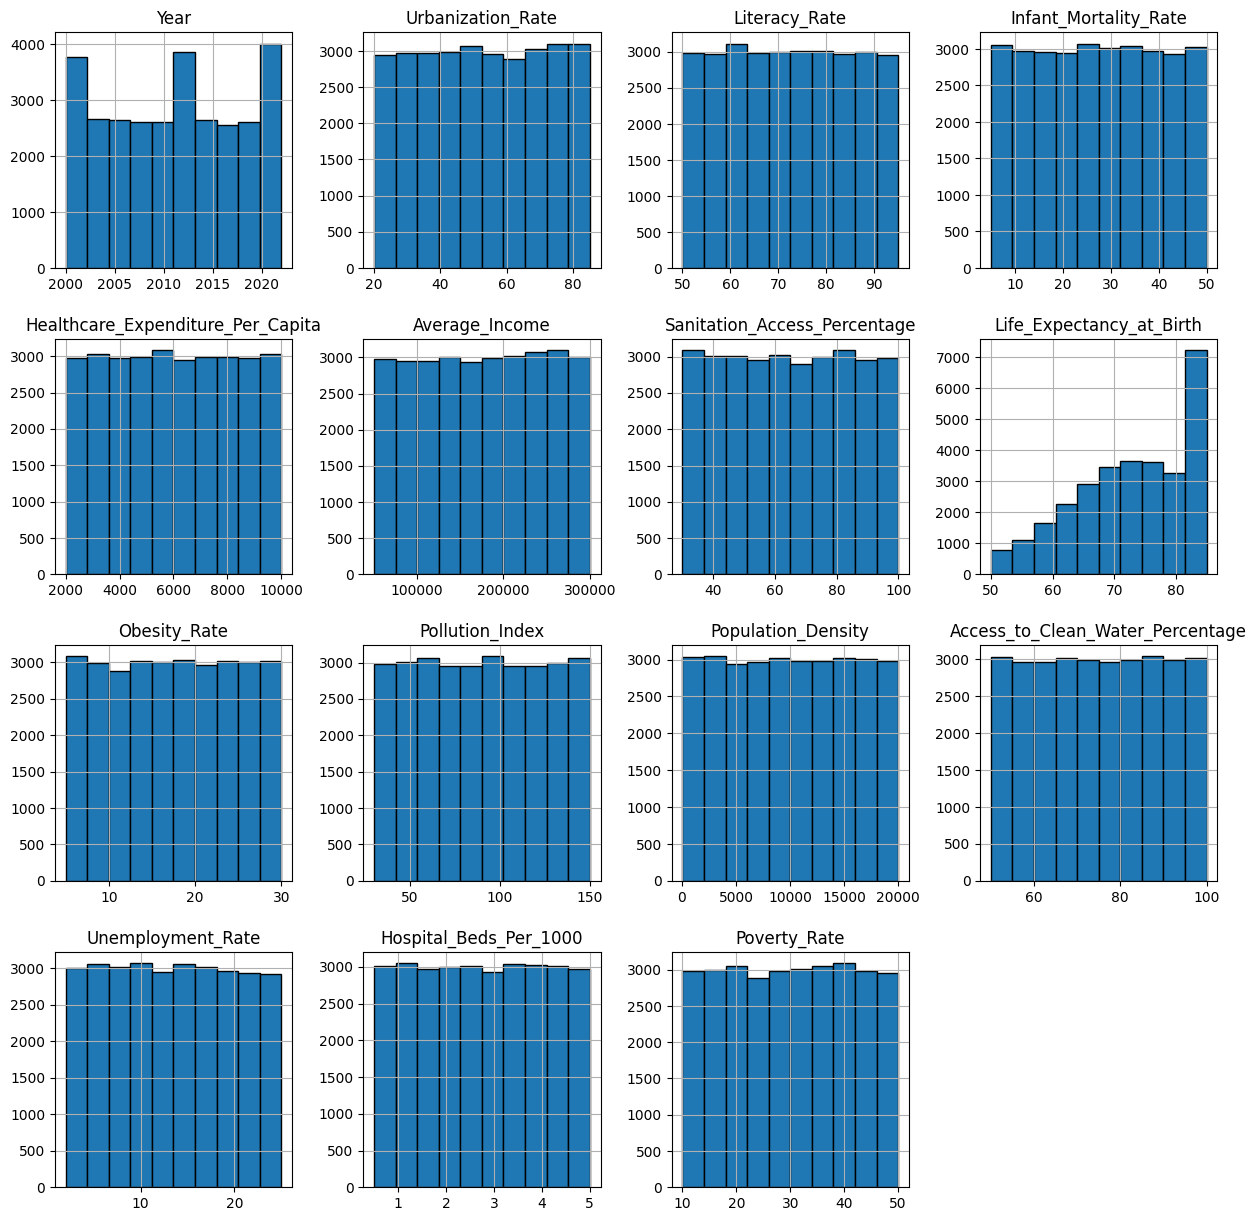

In [ ]:
df.hist(edgecolor='black',figsize=(15,15))

Purpose: Plot histograms for all numerical features to analyze their distributions.

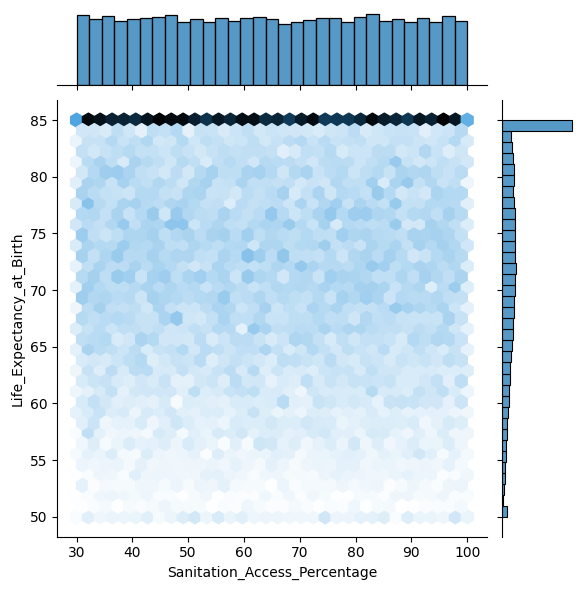

In [ ]:
sns.jointplot(x="Sanitation_Access_Percentage",y="Life_Expectancy_at_Birth",data=df,kind="hex")

Purpose: creates a hexbin plot to visualize the relationship between Sanitation Access Percentage and Life Expectancy at Birth, showing the density of data points in each hexagonal bin.

<Axes: xlabel='Year', ylabel='Life_Expectancy_at_Birth'>

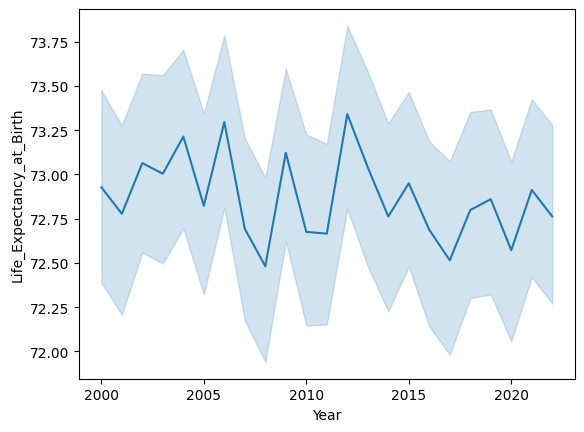

In [ ]:
sns.lineplot(x="Year",y="Life_Expectancy_at_Birth",data=df)

Purpose: The code creates a line plot to show how Life Expectancy at Birth changes over Year in the dataset.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder = LabelEncoder()

In [ ]:
df['State/Region'] = labelencoder.fit_transform(df['State/Region'])

Purpose: Convert categorical variables (State/Region) into numeric format using LabelEncoder.

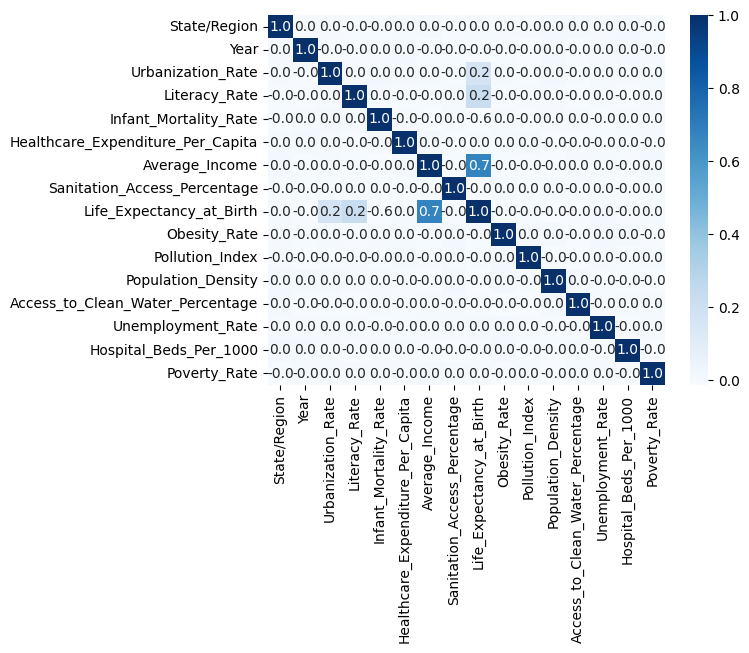

In [ ]:
corr_matrix=df.corr()
corr_matrix
sns.heatmap(corr_matrix,annot=True,fmt='0.01f',robust=True,cmap='Blues')
plt.show()

Purpose: Generate a heatmap to visualize correlations between features and identify highly correlated predictors for Life_Expectancy_at_Birth.

In [ ]:
corr_matrix

,State/Region,Year,Urbanization_Rate,Literacy_Rate,Infant_Mortality_Rate,Healthcare_Expenditure_Per_Capita,Average_Income,Sanitation_Access_Percentage,Life_Expectancy_at_Birth,Obesity_Rate,Pollution_Index,Population_Density,Access_to_Clean_Water_Percentage,Unemployment_Rate,Hospital_Beds_Per_1000,Poverty_Rate
State/Region,1.000000,0.001500,0.002582,-0.003556,-0.003263,0.005459,0.006781,-0.005525,0.004679,0.002088,-0.000940,0.013261,0.006887,0.001083,0.010765,-0.002847
Year,0.001500,1.000000,-0.005730,-0.006555,0.001573,0.007268,-0.004217,-0.003336,-0.008042,-0.002378,-0.010127,0.008594,-0.007039,0.000802,0.010284,-0.000882
Urbanization_Rate,0.002582,-0.005730,1.000000,0.001561,0.006634,0.000663,0.005080,-0.003401,0.166883,0.002938,-0.001403,0.009063,-0.002658,0.003171,0.000487,0.003093
Literacy_Rate,-0.003556,-0.006555,0.001561,1.000000,0.002768,-0.004601,-0.002768,0.000320,0.228178,-0.005394,-0.000616,0.000940,-0.009505,0.004907,-0.011744,0.000812
Infant_Mortality_Rate,-0.003263,0.001573,0.006634,0.002768,1.000000,-0.001242,-0.013371,0.004329,-0.603152,0.000454,-0.001744,0.000767,0.003402,-0.009267,0.002199,0.002245
Healthcare_Expenditure_Per_Capita,0.005459,0.007268,0.000663,-0.004601,-0.001242,1.000000,0.011605,-0.003023,0.003523,0.003762,0.009049,-0.007400,-0.006671,-0.001738,0.002836,-0.000555
Average_Income,0.006781,-0.004217,0.005080,-0.002768,-0.013371,0.011605,1.000000,-0.004467,0.677870,-0.002995,-0.005459,-0.016609,0.002101,0.006458,-0.008124,0.008398
Sanitation_Access_Percentage,-0.005525,-0.003336,-0.003401,0.000320,0.004329,-0.003023,-0.004467,1.000000,-0.008919,0.007892,0.004145,0.007505,-0.000297,0.004956,-0.011553,0.003403
Life_Expectancy_at_Birth,0.004679,-0.008042,0.166883,0.228178,-0.603152,0.003523,0.677870,-0.008919,1.000000,-0.004573,-0.002194,-0.009753,-0.006752,0.009948,-0.007539,0.004780
Obesity_Rate,0.002088,-0.002378,0.002938,-0.005394,0.000454,0.003762,-0.002995,0.007892,-0.004573,1.000000,0.007829,0.008334,-0.012100,0.010249,0.008193,-0.008953


In [ ]:
sor = df.corr()['Life_Expectancy_at_Birth']
sor = sor.sort_values(ascending=False)
sor

,Life_Expectancy_at_Birth
Life_Expectancy_at_Birth,1.000000
Average_Income,0.677870
Literacy_Rate,0.228178
Urbanization_Rate,0.166883
Unemployment_Rate,0.009948
Poverty_Rate,0.004780
State/Region,0.004679
Healthcare_Expenditure_Per_Capita,0.003523
Pollution_Index,-0.002194
Obesity_Rate,-0.004573


In [ ]:
df.drop(['Unemployment_Rate', 'Poverty_Rate', 'State/Region','Healthcare_Expenditure_Per_Capita',
         'Pollution_Index','Obesity_Rate','Access_to_Clean_Water_Percentage','Hospital_Beds_Per_1000',
         'Year','Sanitation_Access_Percentage','Population_Density'], axis=1, inplace=True)

Purpose: Remove features with weak correlation to the target variable (Life_Expectancy_at_Birth) to improve model efficiency.

In [ ]:
sor = df.corr()['Life_Expectancy_at_Birth']
sor = sor.sort_values(ascending=False)
sor

,Life_Expectancy_at_Birth
Life_Expectancy_at_Birth,1.000000
Average_Income,0.677870
Literacy_Rate,0.228178
Urbanization_Rate,0.166883
Infant_Mortality_Rate,-0.603152


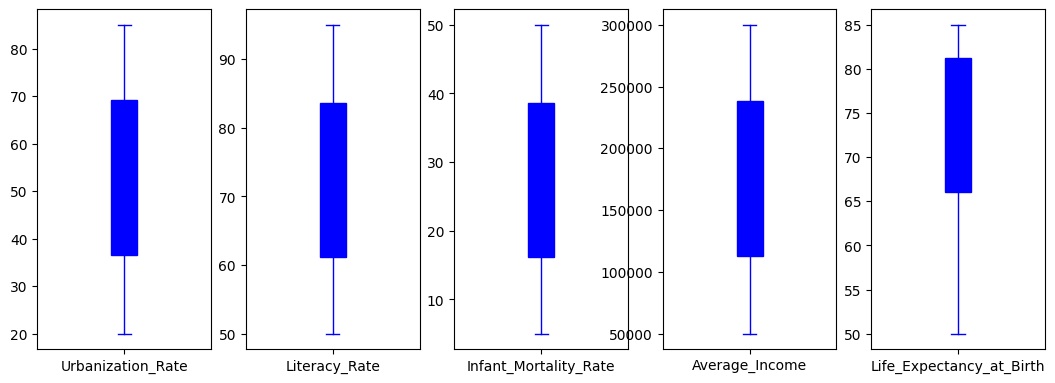

In [ ]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(13,15),color='blue',patch_artist=True)
plt.show()

Purpose: Create box plots for all features to visually identify outliers.

In [ ]:
df.shape

(30000, 5)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV


# Define your features and target variable
X = df[['Urbanization_Rate', 'Literacy_Rate', 'Infant_Mortality_Rate', 'Average_Income']]
y = df['Life_Expectancy_at_Birth']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Purpose: This code scales the features (Urbanization_Rate, Literacy_Rate, Infant_Mortality_Rate, and Average_Income) using StandardScaler to standardize the data. It then splits the dataset into training and testing sets (80% for training, 20% for testing). After that, it trains a Support Vector Regression (SVR) model with an RBF kernel on the scaled training data to predict Life Expectancy at Birth.

In [ ]:
# lr_model = LinearRegression()
# lr_model.fit(X_train, y_train)

# y_pred = lr_model.predict(X_test)

# print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
# print("R^2 Score:", r2_score(y_test, y_pred))

In [ ]:
# dt_model = DecisionTreeRegressor(random_state=42)
# dt_model.fit(X_train, y_train)

# y_pred = dt_model.predict(X_test)

# print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
# print("R^2 Score:", r2_score(y_test, y_pred))

In [ ]:
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# y_pred = rf_model.predict(X_test)

# print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
# print("R^2 Score:", r2_score(y_test, y_pred))

In [ ]:
# gb_model = GradientBoostingRegressor(random_state=42)
# gb_model.fit(X_train, y_train)

# y_pred = gb_model.predict(X_test)

# # # Evaluation
# print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
# print("R^2 Score:", r2_score(y_test, y_pred))

In [ ]:
# xgb_model = XGBRegressor(random_state=42)
# xgb_model.fit(X_train, y_train)

# y_pred = xgb_model.predict(X_test)

# print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
# print("R^2 Score:", r2_score(y_test, y_pred))

In [ ]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 6.9643692220712525
R^2 Score: 0.9221626055972258


In [ ]:
# mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
# mlp_model.fit(X_train, y_train)

# y_pred = mlp_model.predict(X_test)

# print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
# print("R^2 Score:", r2_score(y_test, y_pred))

In [ ]:
param_grid = {
    'C': [1, 10],
    'gamma': ['scale'],
    'kernel': ['linear', 'rbf']
}
grid_search = GridSearchCV(SVR(), param_grid, cv=3, verbose=1)
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(SVR(), param_distributions=param_grid, n_iter=5, cv=5, verbose=1, random_state=42)
random_search.fit(X_train, y_train)

print(f"Best parameters: {random_search.best_params_}")
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)
grid_search.fit(X_sample, y_sample)
grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 10], 'gamma': ['scale'],
                         'kernel': ['linear', 'rbf']},
             verbose=1)

Purpose: This code performs hyperparameter tuning for the Support Vector Regression (SVR) model using both RandomizedSearchCV and GridSearchCV. First, RandomizedSearchCV is used to search the best hyperparameters from a random subset of the parameter grid. Then, a sample of the training data is used to fit the GridSearchCV, which exhaustively searches all possible combinations of hyperparameters. Finally, the best parameters found are printed.

In [ ]:
# Get user input
Urbanization_Rate = float(input('Enter the Urbanization_Rate: '))
Literacy_Rate = float(input('Enter the Literacy_Rate: '))
Infant_Mortality_Rate = float(input('Enter the Infant_Mortality_Rate: '))
Average_Income = float(input('Enter the Average_Income: '))

# Prepare the user input array
user_input = np.array([[Urbanization_Rate, Literacy_Rate, Infant_Mortality_Rate, Average_Income]])

# Scale the user input
user_input_scaled = scaler.transform(user_input)

# Predict the Life Expectancy at Birth
predicted_Life_Expectancy_at_Birth = svr_model.predict(user_input_scaled)

print(f"Predicted Life Expectancy at Birth: {predicted_Life_Expectancy_at_Birth[0]}")


Enter the Urbanization_Rate: 75.401646
Enter the Literacy_Rate: 85.289122
Enter the Infant_Mortality_Rate: 20.599732
Enter the Average_Income: 232901.889905
Predicted Life Expectancy at Birth: 84.72490485767663


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Purpose: This code takes user input for four features, scales the input, and predicts the Life Expectancy at Birth using the trained SVR model.

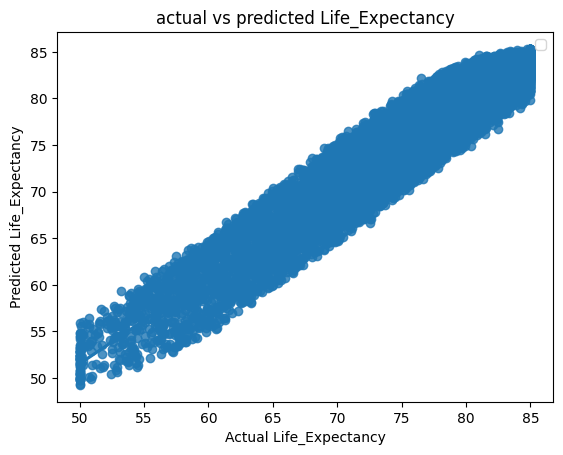

In [ ]:
sns.regplot(x=y_test,y=y_pred)
plt.xlabel('Actual Life_Expectancy')
plt.ylabel('Predicted Life_Expectancy')
plt.title('actual vs predicted Life_Expectancy')
plt.legend()
plt.show()

In [ ]:
import pickle
with open('model.pkl','wb') as f:
  pickle.dump(svr_model,f)